In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("ads_data_full.csv")
df.head()

,Advertising Cost (USD),Sales Revenue (USD),Social Media Engagements,Website Traffic
0,784,5167.683485,165,6899
1,659,4736.040926,288,2245
2,729,4799.105662,248,1325
3,292,2307.039663,275,2124
4,935,5917.849078,472,4391


In [4]:
df.shape

(35, 4)

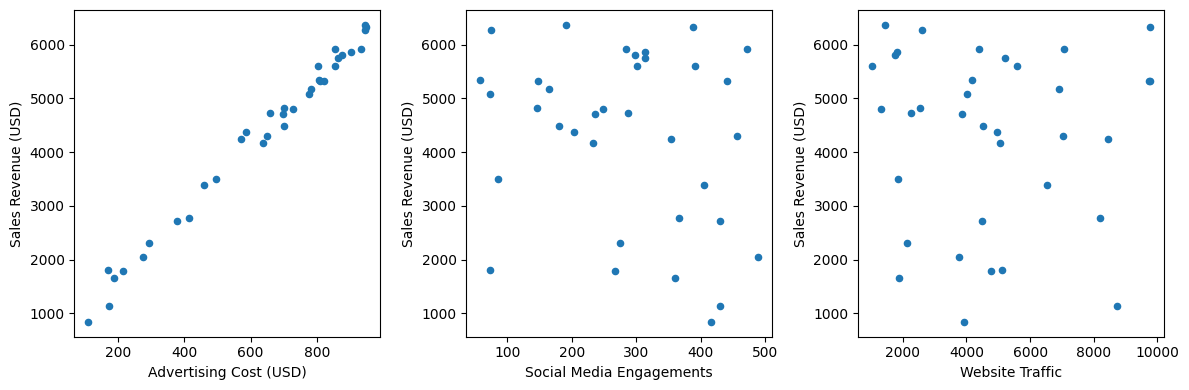

In [6]:
figure, axes = plt.subplots(1, 3, figsize=(12, 4))
df.plot.scatter(
    x = "Advertising Cost (USD)",
    y = "Sales Revenue (USD)",
    ax = axes[0]
)
df.plot.scatter(
    x = "Social Media Engagements",
    y = "Sales Revenue (USD)",
    ax = axes[1]
)
df.plot.scatter(
    x = "Website Traffic",
    y = "Sales Revenue (USD)",
    ax = axes[2]
)

plt.tight_layout()
plt.show()

In [47]:
x = df.iloc[:, [0,2,3]]
y = df.iloc[:, [1]]
x.columns, y.columns

(Index(['Advertising Cost (USD)', 'Social Media Engagements',
        'Website Traffic'],
       dtype='object'),
 Index(['Sales Revenue (USD)'], dtype='object'))

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #test_size dùng để test khoảng x%, còn lại để train 1-x%
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(28, 3) (28, 1)
(7, 3) (7, 1)


In [49]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
y_pred = model.predict(x_test) # model học theo x_test

In [51]:
model.coef_, model.intercept_

(array([[ 6.04888920e+00, -4.59774788e-01, -1.57647966e-03]]),
 array([632.36988093]))

In [52]:
mse = mean_squared_error(y_test, y_pred)
mse

57528.24723311391

In [53]:
r2 = r2_score(y_test, y_pred)
r2

0.9676269181567754